In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reason for using encoding is 'Encoding suitable as the contents of a Unicode literal in ASCII-encoded Python source code, except that quotes are not escaped.'

In [52]:
data=pd.read_csv('/content/Diwali Sales Data.csv',encoding='unicode_escape')

In [53]:
data.shape

(11251, 15)

In [54]:
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


**DATA CLEANING AND DATA PREPROCESSING**

data.info() is to find out the count of non-null values and their datatypes - if null values we can remove those for convenient data analysis


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [56]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [57]:
# data.shape
data.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99


In [58]:
# Total no of people who ordered from different age groups
count_age_groups=data.groupby(['Age Group']).agg({'Age':['count','min','max']})
count_age_groups.head(7)

Age        
          count min max
Age Group              
0-17        296  12  17
18-25      1879  18  25
26-35      4543  26  35
36-45      2286  26  45
46-50       987  46  50
51-55       832  51  55
55+         428  56  92

In [59]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

We found 12 null values in the Amount Column, we need to remove those null values for clear analysis

In [60]:
data.dropna(inplace=True)

Cross checking for null values

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


Converting AMOUNTS dtypes from float64 to int64


In [62]:
data['Amount']=data['Amount'].astype('int')

In [63]:
# data.describe() #to get insight of all int type data columns
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


From here we can see that maximum amount spent=Rs.23952 and minimum amount spent=Rs.188 and age range Ordered is 12-92

**EXPLORATORY DATA ANALYSIS**

***GENDER ANALYSIS***

Q)Which gender has ordered more no of items?

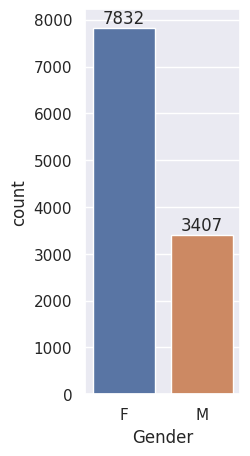

In [64]:
sns.set(rc={'figure.figsize':(2,5)})
ax=sns.countplot(x='Gender',data=data)
for values in ax.containers:
  ax.bar_label(values)

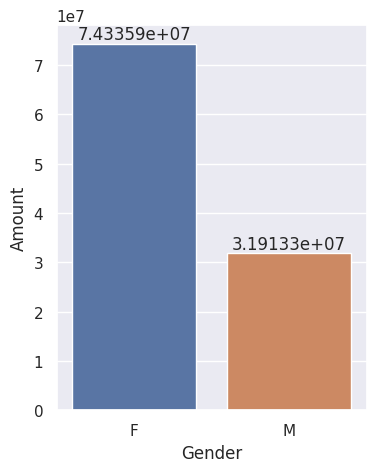

In [65]:
sns.set(rc={'figure.figsize':(4,5)})
sales_gen = data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Gender',y='Amount',data=sales_gen)
for i in ax.containers:
  ax.bar_label(i)

Key Results -
Female Customers > Male Customers

***AGE GROUP ANALYSIS***

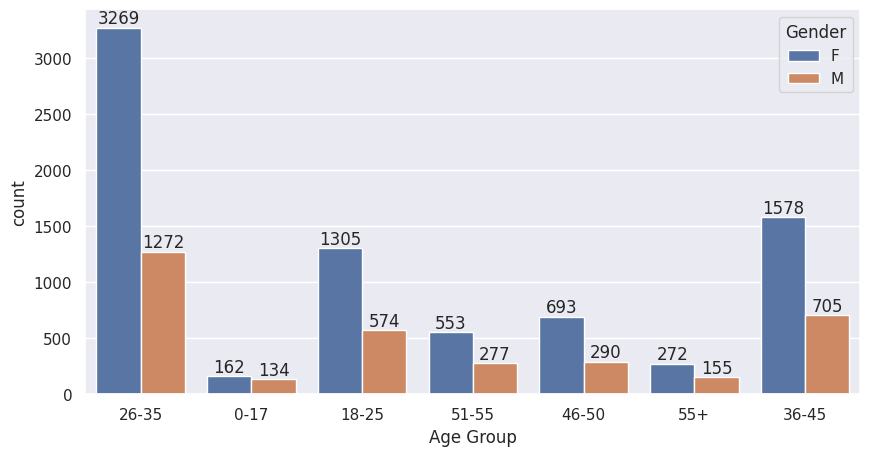

In [66]:
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='Age Group',data=data,hue='Gender')
for values in ax.containers:
  ax.bar_label(values)

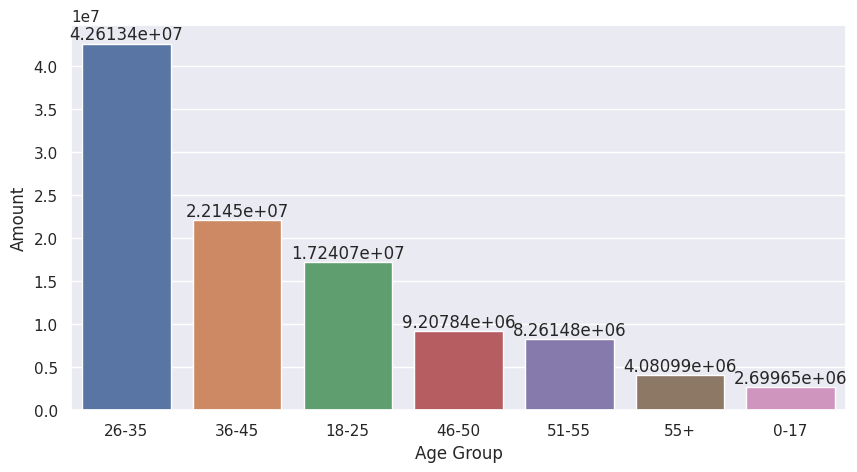

In [67]:
sns.set(rc={'figure.figsize':(10,5)})
sales_age = data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Age Group',y='Amount',data=sales_age)
for value in ax.containers:
  ax.bar_label(value)

Key Results - Age Group 26-35 spend more

In [68]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

***MARITAL STATUS ANALYSIS***

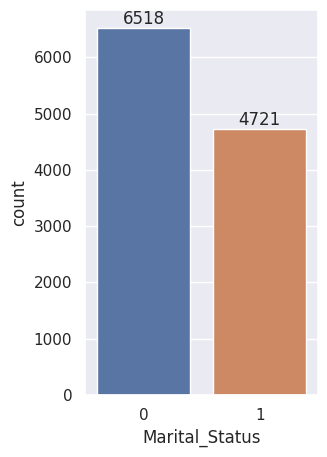

In [69]:
sns.set(rc={'figure.figsize':(3,5)})
ax=sns.countplot(x='Marital_Status',data=data)
for value in ax.containers:
  ax.bar_label(value)

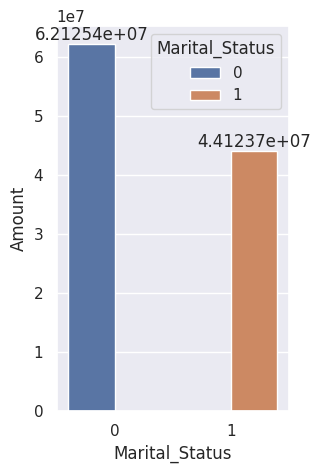

In [70]:
sns.set(rc={'figure.figsize':(3,5)})
sales_age = data.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(x='Marital_Status',y='Amount',data=sales_age,hue='Marital_Status')
for value in ax.containers:
  ax.bar_label(value)

Key Results - Married Customers are more than Unmarried Customers

***STATE ANALYSIS***

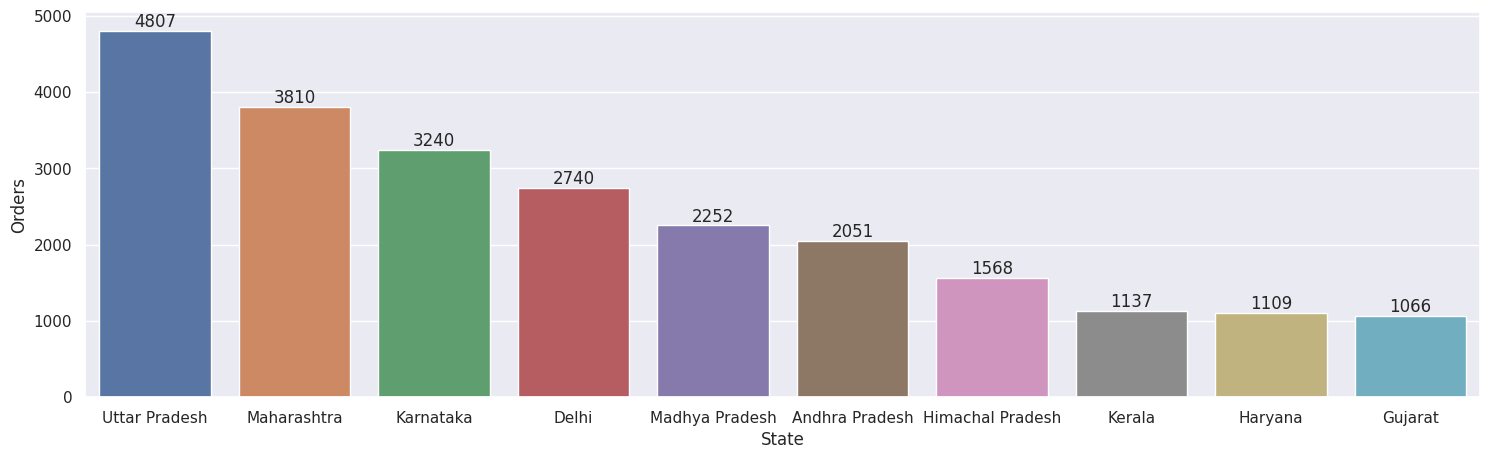

In [71]:
sales_state = data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(x='State',y='Orders',data=sales_state)
for i in ax.containers:
  ax.bar_label(i)

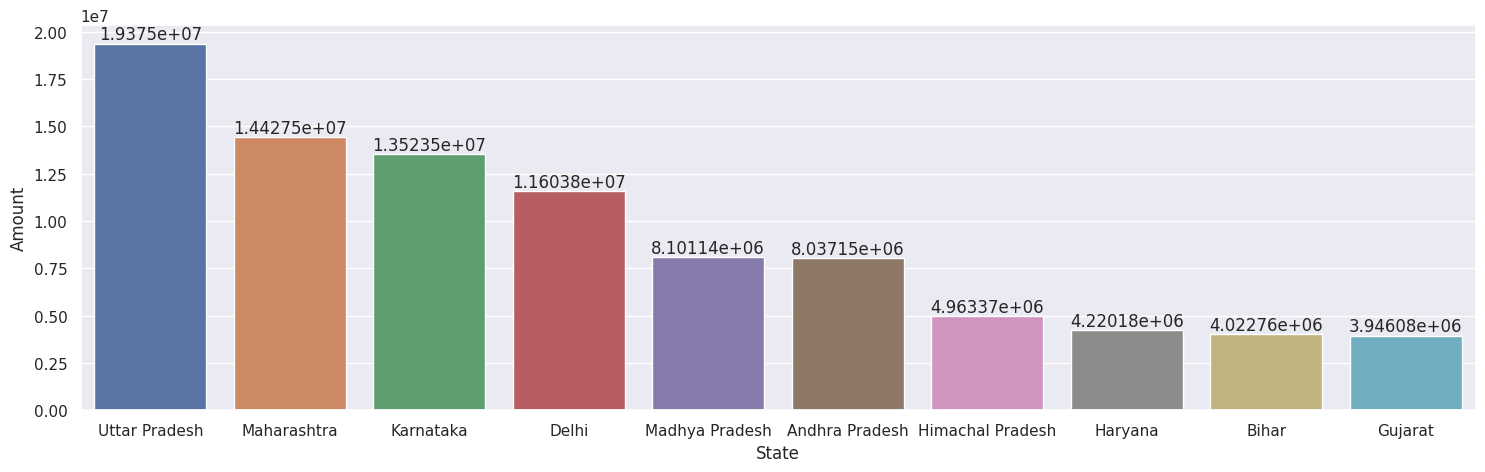

In [72]:
sales_state = data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(18,5)})
ax=sns.barplot(x='State',y='Amount',data=sales_state)
for i in ax.containers:
  ax.bar_label(i)

Key Results - States Uttarpardesh has highest orders and spendings followed by Maharastra,Karnataka

***PRODUCT CATEGORY ANALYSIS***

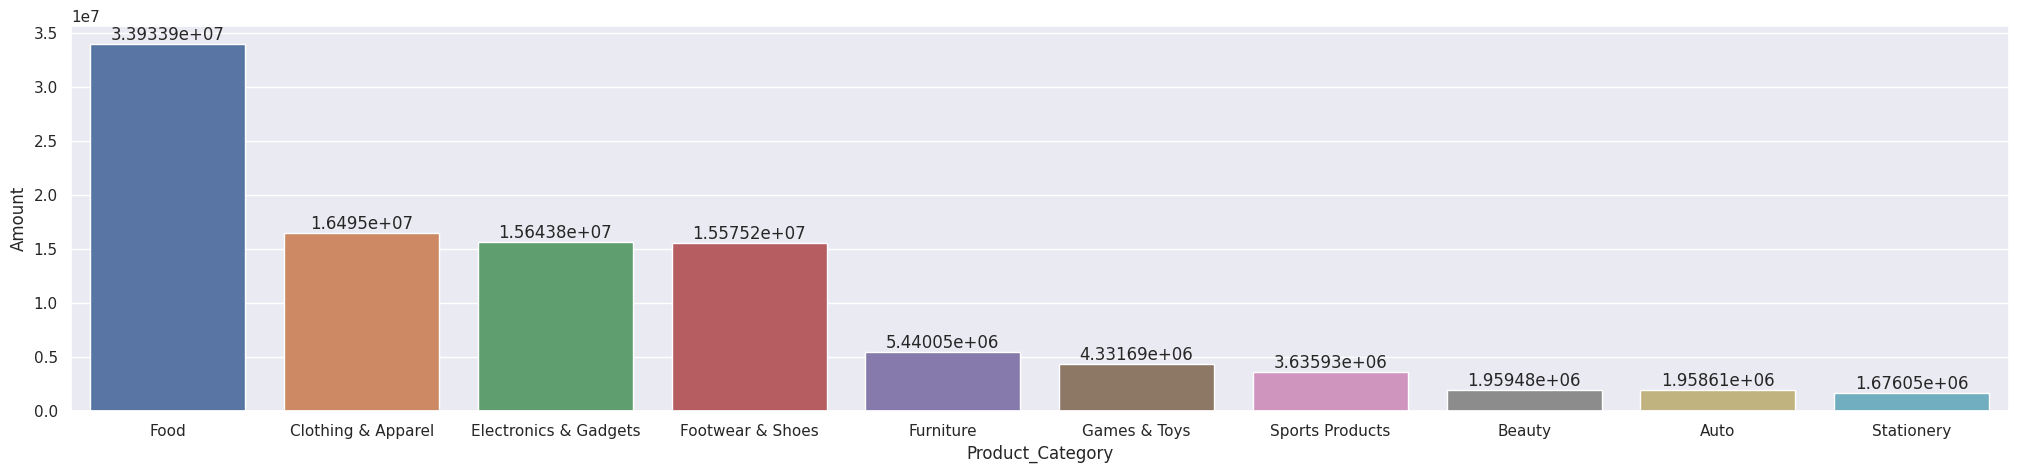

In [73]:
sns.set(rc={'figure.figsize':(25,5)})
p=data.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
ax=sns.barplot(x='Product_Category',y='Amount',data=p)
for i in ax.containers:
  ax.bar_label(i)

Key Results - Most orders are from category Foods, Clothing, Electronics, Footwear

***TOP 5 MOST SOLD PRODUCTS***

<Axes: xlabel='Product_ID'>

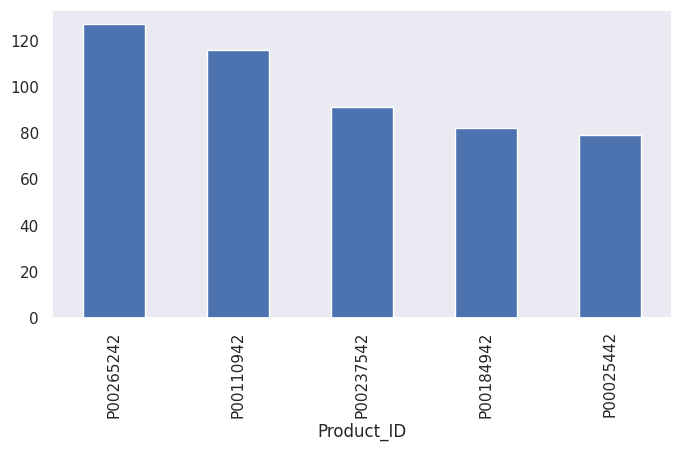

In [77]:
fig1,ax1 = plt.subplots(figsize=(8,4))
sns.set_style('ticks')
data.groupby('Product_ID')['Orders'].sum().nlargest(5).sort_values(ascending=False).plot(kind='bar')

Summarizing all the Key results for Future Growth


1.   Female Customers preferred than male customers
2.   26-35 age group are our Target Customers and especially Married Csutomers
3.   Should sell more products in Uttarpradesh, Maharastra, Karnataka
4. Should increase Manufacturing and Production on Foods, clothing and footwear


